In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def pca(data, n_components=20):
    data_scaled = StandardScaler().fit_transform(data)
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(data_scaled)
    return pca.explained_variance_ratio_
def load_eigs_npz(filename='results/results-L-2-W-0.1-seed-0.npz', what='vals'):
    data = np.load(filename)
    if what == 'vals':
        return data[data.files[0]]
    else:
        return data[data.files[1]].flatten()
    
def file_path(L,w,seed):
    return '../dim-mbl/data/results-L-{}-W-{}-seed-{}.npz'.format(L,w,seed)  

In [52]:
Ls = [10,12]
ws = [1.0, 1.44, 1.89, 2.33, 2.78, 3.22, 3.67, 4.11, 4.56, 5.0, 
                      5.56, 6.11, 6.67, 7.22, 7.78, 8.33, 8.89, 9.44]
seeds = np.arange(0,60,1)

exp_var_many = np.zeros((len(Ls),len(ws)))
exp_many_PCs = []
for index0, L in enumerate(Ls):
    for index1, w in enumerate(tqdm(ws)):
        X = np.array([load_eigs_npz(file_path(L, w,seed), what='vecs') for seed in seeds])
        exp_var = pca(X, n_components=40)
        exp_var_many[index0,index1] = sum(exp_var[:L])
        exp_many_PCs.append(exp_var)

100%|██████████| 18/18 [04:41<00:00, 15.65s/it]


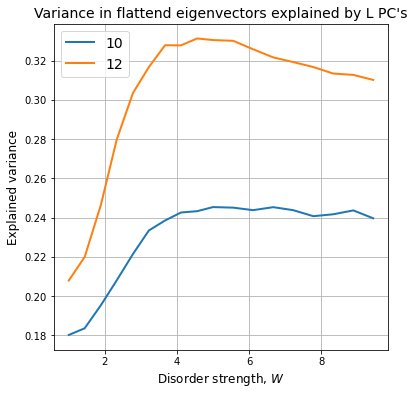

In [7]:
plt.figure(figsize=(6,6))

for L, exp_var in zip(Ls, exp_var_many):
    plt.plot(ws, exp_var, 
             lw=2, label=L)
    
plt.legend(fontsize=14)

plt.title("Variance in flattend eigenvectors explained by L PC's", fontsize=14)
plt.xlabel('Disorder strength, $W$', fontsize=12)
plt.ylabel('Explained variance', fontsize=12)
plt.grid()

#plt.xscale('log')
#plt.xticks(np.arange(1,9,2),np.arange(1,9,2))
plt.savefig('figures/PCA_L_PCs.png', dpi=500, bbox_inches='tight')
plt.show()

3.2199999999999998 $\pm $ 0.88
3.0 $\pm $ 0.66


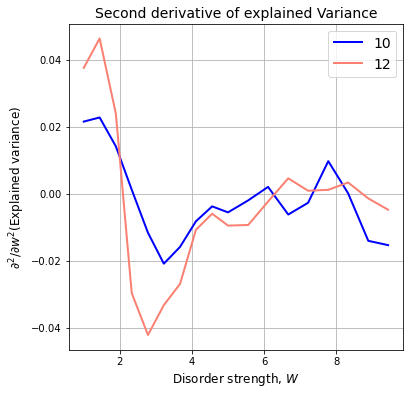

In [8]:
colors = 'blue, salmon, yellowgreen, orange, black, red'.split(', ')


plt.figure(figsize=(6,6))

L, exp_var, color = Ls[0], exp_var_many[0], colors[0]
d1 = np.gradient(exp_var, .44)
d2 = np.gradient(d1, .44)
plt.plot(ws, d2, c=color, lw=2, label=L)

low_d2_w = ws[np.argmin(d2)]
uncertainty = (ws[1]-ws[0])
#plt.fill_between([low_d2_w-uncertainty*2,low_d2_w+uncertainty*2], [min(d2)]*2,[max(d2)]*2,
#        alpha=0.3, color=color)

print(np.mean([low_d2_w-uncertainty*2,low_d2_w+uncertainty*2]),
      '$\pm $', round(uncertainty*2, 2))

L, exp_var, color = Ls[1], exp_var_many[1], colors[1]
d1 = np.gradient(exp_var, .44)
d2 = np.gradient(d1, .44)
plt.plot(ws, d2, c=color, lw=2, label=L)

low_d2_w = ws[np.argmin(d2)]
uncertainty = (ws[1]-ws[0])
#plt.fill_between([low_d2_w-uncertainty,low_d2_w+uncertainty*2], [min(d2)]*2,[max(d2)]*2,
#        alpha=0.3, color=color)

print(np.mean([low_d2_w-uncertainty,low_d2_w+uncertainty*2]),
      '$\pm $', round(uncertainty*1.5, 2))

#plt.plot([0,1.5],[0.02]*2)
#plt.plot([4,10],[0.00]*2, c='g', lw=3, ls='--')

plt.legend(fontsize=14)

plt.title("Second derivative of explained Variance", fontsize=14)
plt.xlabel('Disorder strength, $W$', fontsize=12)
plt.ylabel('$\partial^2/\partial w^2$'+'(Explained variance)', fontsize=12)
plt.grid()
#plt.xscale('log')
#plt.xticks(np.arange(1,9,2),np.arange(1,9,2))
plt.savefig('figures/d2dw_PCA_L_PCs.png', dpi=500, bbox_inches='tight')
plt.show()


<ipython-input-112-34c7a5c0194f>:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


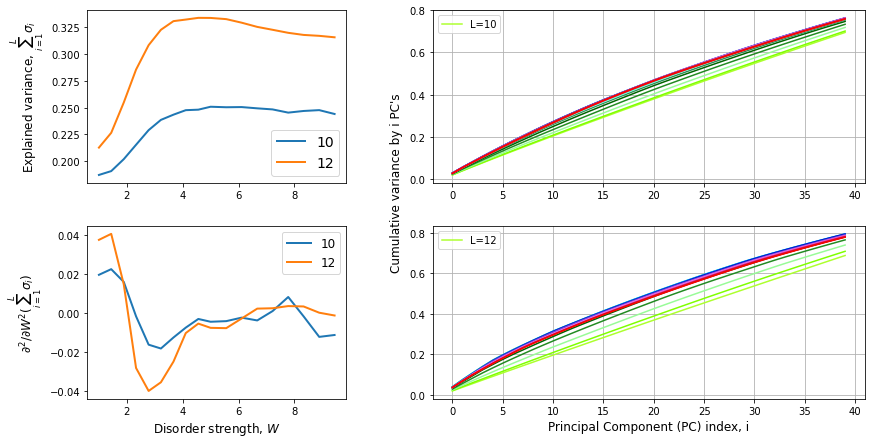

In [112]:
# Importing library
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,6))

ax0 = fig.add_axes([0.1, 0.6, 0.3, 0.4])
ax1 = fig.add_axes([0.1, .1, 0.3, 0.4])
ax2 = fig.add_axes([0.5, 0.6, 0.5, .4])
ax3 = fig.add_axes([0.5, 0.1, 0.5, .4])


## AX0
for L, exp_var in zip(Ls, exp_var_many):
    ax0.plot(ws, exp_var, 
             lw=2, label=L)
    
ax0.legend(fontsize=14)
#ax0.set_xlabel('Disorder strength, $W$', fontsize=12)
ax0.set_ylabel('Explained variance, $\sum_{i=1}^L \sigma_i$', fontsize=12)

## AX 1
for L, exp_var in zip(Ls, exp_var_many):
    d1 = np.gradient(exp_var, .44)
    d2 = np.gradient(d1, .44)
    ax1.plot(ws, d2, lw=2, label=L)
ax1.legend(fontsize=12)
ax1.set_xlabel('Disorder strength, $W$', fontsize=12)

ax1.set_ylabel('$\partial^2/\partial W^2(\sum_{i=1}^L \sigma_i$)', fontsize=12)


## AX 2
exp_many_PCs_10 = np.array(exp_many_PCs[:18])

colors = '''greenyellow, chartreuse, palegreen, forestgreen, darkgreen,
seagreen, aquamarine, turquoise, lightseagreen,
deepskyblue, mediumblue, slateblue, blueviolet,
violet, orchid, deeppink, firebrick, red'''.replace("\n", " ").split(', ')

for i, w, color in zip(exp_many_PCs_10, ws, colors):
    cummulative = [sum(i[:j]) for j in range(1,len(i)+1)]
    ax2.plot(range(40), cummulative, c=color)
ax2.legend(["L=10"])
#ax2.set_xlabel('Disorder, $W$', fontsize=12)

ax2.grid()


## AX 2
exp_many_PCs_12 = np.array(exp_many_PCs[18:])

colors = '''greenyellow, chartreuse, palegreen, forestgreen, darkgreen,
seagreen, aquamarine, turquoise, lightseagreen,
deepskyblue, mediumblue, slateblue, blueviolet,
violet, orchid, deeppink, firebrick, red'''.replace("\n", " ").split(', ')

for i, w, color in zip(exp_many_PCs_12, ws, colors):
    cummulative = [sum(i[:j]) for j in range(1,len(i)+1)]
    ax3.plot(range(40), cummulative, c=color)
    
ax3.set_xlabel('Principal Component (PC) index, i', fontsize=12)
#ax3.set_ylabel('Intrinsic Dimensionality', fontsize=12)
ax3.grid()
ax3.legend(["L=12"])
fig.text(.45,.4,"Cumulative variance by i PC's", fontsize=12, rotation='vertical')


plt.savefig('figures/PCA_MBL_all.png', dpi=500, bbox_inches='tight')
fig.show()



(18, 40)

In [90]:
exp_many_PCs_12 = np.array(exp_many_PCs[18:])
np.shape(exp_many_PCs_12)

(18, 40)

In [ ]:
#Make these cumulative



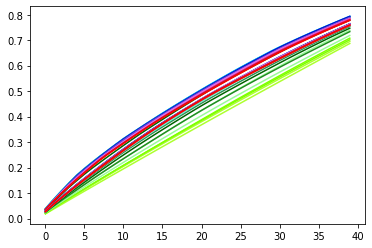

In [92]:

    
#plt.yscale('log')

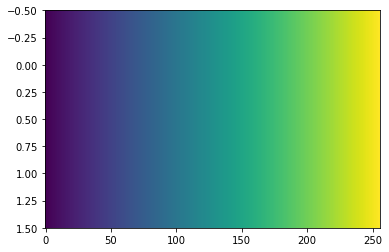

In [66]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps

    plt.imshow(gradient, aspect='auto')
        

for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

array([[0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
        0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
        0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
        0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
        0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
        0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
        0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
        0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
        0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
        0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
        0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
        0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
        0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
        0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
        0.2745098 , 0.27843137, 0.28235294, 0.28